# Time Series Analysis FINAL

## Blue it, earn it

### Reading File

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv('Dow_Jones_Industrial_Average_Historical_Data.csv')
data

,Date,Price,Open,High,Low,Vol.,Change %
0,"Dec 31, 2019","28,538.44","28,414.64","28,547.35","28,376.49",193.34M,0.27%
1,"Dec 30, 2019","28,462.14","28,654.76","28,664.69","28,428.98",185.07M,-0.64%
2,"Dec 27, 2019","28,645.26","28,675.34","28,701.66","28,608.98",184.93M,0.08%
3,"Dec 26, 2019","28,621.39","28,539.46","28,624.10","28,535.15",155.97M,0.37%
4,"Dec 24, 2019","28,515.45","28,572.57","28,576.80","28,503.21",95.29M,-0.13%
...,...,...,...,...,...,...,...
2761,"Jan 09, 2009","8,599.18","8,738.80","8,800.45","8,541.75",-,-1.64%
2762,"Jan 08, 2009","8,742.46","8,769.94","8,807.14","8,593.52",-,-0.31%
2763,"Jan 07, 2009","8,769.70","8,996.94","8,996.94","8,690.45",-,-2.72%
2764,"Jan 06, 2009","9,015.10","8,954.57","9,175.19","8,868.07",-,0.69%


In [12]:
counter = 0
for i in range(len(data)):
    if data["Vol."][i] == '-':
        counter += 1
print(f"We have {counter} missing values in Vol.")
print(type(data["Vol."][0]))
print(type(data["Price"][0]))
print(type(data["Open"][0]))
print(type(data["High"][0]))
print(type(data["Low"][0]))
print(type(data["Change %"][0]))
print()

We have 342 missing values in Vol.
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>



In [13]:
data = pd.read_csv('clean_dj.csv')
data

,Date,Price,Open,High,Low,Vol.,Change %
0,31-Dec-19,28538.44,28414.64,28547.35,28376.49,193.34,0.27
1,30-Dec-19,28462.14,28654.76,28664.69,28428.98,185.07,-0.64
2,27-Dec-19,28645.26,28675.34,28701.66,28608.98,184.93,0.08
3,26-Dec-19,28621.39,28539.46,28624.10,28535.15,155.97,0.37
4,24-Dec-19,28515.45,28572.57,28576.80,28503.21,95.29,-0.13
...,...,...,...,...,...,...,...
2761,9-Jan-09,8599.18,8738.80,8800.45,8541.75,NaN,-1.64
2762,8-Jan-09,8742.46,8769.94,8807.14,8593.52,NaN,-0.31
2763,7-Jan-09,8769.70,8996.94,8996.94,8690.45,NaN,-2.72
2764,6-Jan-09,9015.10,8954.57,9175.19,8868.07,NaN,0.69


### Fill by Moving Average

In [57]:
import pandas as pd

data = pd.read_csv("clean_dj.csv")
tmp = 0
for i in range(343):
    tmp = 0
    for j in range(8):
        tmp += data["Vol."][len(data)-j-i-343]
    data["Vol."][len(data) - i-1] = tmp/5

C:\Users\User\AppData\Local\Temp\ipykernel_14372\3489656640.py:9: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  data["Vol."][len(data) - i-1] = tmp/5
C:\Users\User\AppData\Local\Temp\ipykernel_14372\3489656640.py:9: SettingWithCopyWarning: 


### Plot the Graph

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(data["Vol."], label='True Prices', color='blue')
plt.title('LSTM Price Prediction')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

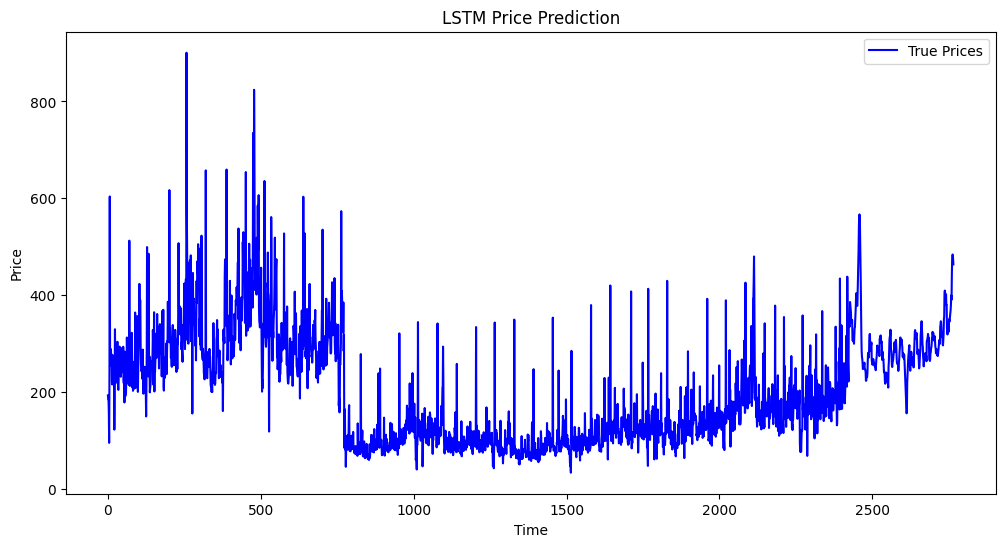

In [58]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(data["Vol."], label='True Prices', color='blue')
plt.title('LSTM Price Prediction')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

### Split Train and Test Data 

In [59]:
data[:21]

,Date,Price,Open,High,Low,Vol.,Change %
0,31-Dec-19,28538.44,28414.64,28547.35,28376.49,193.34,0.27
1,30-Dec-19,28462.14,28654.76,28664.69,28428.98,185.07,-0.64
2,27-Dec-19,28645.26,28675.34,28701.66,28608.98,184.93,0.08
3,26-Dec-19,28621.39,28539.46,28624.10,28535.15,155.97,0.37
4,24-Dec-19,28515.45,28572.57,28576.80,28503.21,95.29,-0.13
5,23-Dec-19,28551.53,28491.78,28582.49,28491.78,233.47,0.34
6,20-Dec-19,28455.09,28608.64,28608.64,28445.60,603.78,0.28
7,19-Dec-19,28376.96,28278.31,28381.48,28278.24,262.57,0.49
8,18-Dec-19,28239.28,28291.44,28323.25,28239.28,289.89,-0.10
9,17-Dec-19,28267.16,28221.75,28328.63,28220.56,286.77,0.11


### Output Files

In [60]:
data.to_csv("dj_moving_average.csv", index=None)

In [61]:
data[21:].to_csv("dj_moving_average_train.csv", index=None)

In [62]:
data[:21].to_csv("dj_moving_average_test.csv", index=None)